<a href="https://colab.research.google.com/github/nirvanK11/TELECOM-CUSTOMER-CHURN/blob/main/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
   from sklearn.cluster import KMeans
   import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#df1= pd.read_csv("/content/clean_data (1).csv")

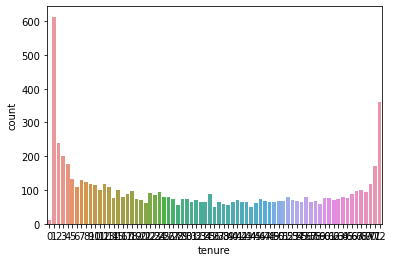

In [ ]:
sns.countplot(x =df['tenure'])


In [ ]:
service = df[['PhoneService',"MultipleLines" ,"InternetService",]]

In [ ]:
service

,PhoneService,MultipleLines,InternetService
0,No,No phone service,DSL
1,Yes,No,DSL
2,Yes,No,DSL
3,No,No phone service,DSL
4,Yes,No,Fiber optic
...,...,...,...
7038,Yes,Yes,DSL
7039,Yes,Yes,Fiber optic
7040,No,No phone service,DSL
7041,Yes,Yes,Fiber optic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'].sort_values()

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
df['TotalCharges'] = df.TotalCharges.str.strip()
df = df.replace('', np.nan)
df['TotalCharges'].sort_values()

105      100.2
4459    100.25
1723    100.35
2124     100.4
2208     100.8
         ...  
3826       NaN
4380       NaN
5218       NaN
6670       NaN
6754       NaN
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
df[df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df.TotalCharges.isna().sum()

11

In [ ]:
df = df.dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#df['TotalCharges'] = np.where(df['TotalCharges']==' ', np.nan, df['TotalCharges'])   # Conveting blank space to NaN

#df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x))

In [ ]:
df['yearly'] = 12 * df['TotalCharges'] / df['tenure']
df['tenureinyears'] = df['tenure'] / 12
coef = np.polyfit(df['tenureinyears'], df['yearly'], 1)
coef

array([ 43.59973014, 659.79465541])

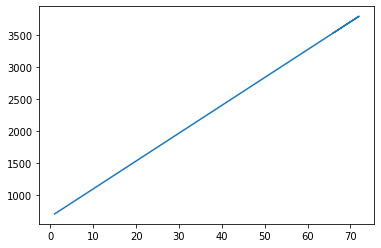

In [ ]:
plt.plot(df['tenure'], coef[0]*df['tenure'] + coef[1])

In [ ]:
df['distance'] = df['yearly'] - (coef[0]*df['tenureinyears'] + coef[1])
df['distance'].sort_values()

932    -703.926370
2338   -700.918036
1277   -700.351370
6614   -697.855500
3122   -696.233322
           ...    
3159    672.305412
2280    673.963858
2265    681.355614
440     693.984871
171     789.738723
Name: distance, Length: 7032, dtype: float64

In [ ]:
df[(df['Churn'] == 'Yes') & (df['distance'] > 0) & (df['tenureinyears'] < 3)].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yearly,tenureinyears,distance
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,909.90,0.166667,242.838723
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1230.75,0.666667,541.888858
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1305.45,2.333333,543.922641
29,8773-HHUOZ,Female,0,No,Yes,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.70,1093.10,Yes,771.60,1.416667,50.039060
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes,760.56,0.416667,82.598790


In [ ]:
df[(df['Churn'] == 'Yes') & (df['distance'] < 0) & (df['tenureinyears'] > 5)].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yearly,tenureinyears,distance
430,9063-ZGTUY,Female,0,Yes,Yes,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.40,1182.55,Yes,232.632787,5.083333,-648.793830
4149,6559-ILWKJ,Male,0,Yes,No,71,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Two year,No,Electronic check,49.35,3515.25,Yes,594.126761,5.916667,-323.632965
4642,5458-CQJTA,Male,0,Yes,Yes,65,Yes,No,DSL,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),74.80,4820.15,Yes,889.873846,5.416667,-6.086014
5441,3512-IZIKN,Female,0,Yes,No,70,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,Two year,No,Credit card (automatic),65.30,4759.75,Yes,815.957143,5.833333,-98.169272
5841,7136-RVDTZ,Male,1,No,No,70,No,No phone service,DSL,No,No,No,No,Yes,Yes,One year,Yes,Electronic check,45.25,3264.45,Yes,559.620000,5.833333,-354.506415


In [ ]:
cust1 = df.iloc[5]
cust2 = df.iloc[430]

We were able to develop the best-fitting line that we wanted. Let's take two consumers using our data set as an example, both of whom have already churned. To show the difference in their estimates, we'll choose one client who is beneficial for retaining one and client who isn't really profitable for retention.

Distance for customer #1: 541.8888578283457
Distance for customer #2: -648.7938300861074


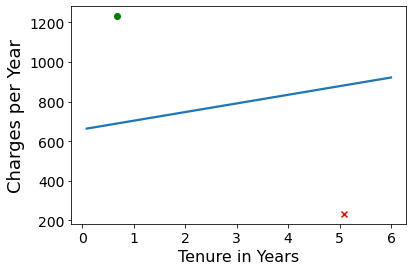

In [ ]:
ax = sns.regplot(data = df, x = 'tenureinyears', y = 'yearly', scatter = False, ci = None)
ax.set_title('', fontsize=20, pad=30, fontdict={'weight': 'bold'})
ax.set_xlabel('Tenure in Years', fontsize=16)
ax.set_ylabel('Charges per Year', fontsize=18)
ax.tick_params(labelsize=14)
plt.xticks(range(0,7,1))
# plt.yticks(range(650,1000,50))

plt.scatter(x=cust1['tenureinyears'], y=cust1['yearly'], c='green', marker='o')
print('Distance for customer #1:', cust1['distance'])

plt.scatter(x=cust2['tenureinyears'], y=cust2['yearly'], c='red', marker='x')
print('Distance for customer #2:', cust2['distance'])

plt.show()

We plotted the two clients' data points on the graph above. We can see right away that customer one (green dot) is above the line of best fit, indicating that he or she is worth retending because the distance between the data point and the line of best fit is positive. The computed distance is the greatest discount you can offer this particular consumer. Customer two (red x-mark), on the other hand, falls below the line of best fit, indicating that retending this customer is not lucrative. The data point's distance from the line of best fit is negative.

These data points could be from consumers who have already left, but in retrospect, we could have tried to re-engage them by offering a discount.

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yearly,tenureinyears,distance
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,358.200000,0.083333,-305.227966
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,666.882353,2.833333,-116.444871
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,648.900000,0.166667,-18.161277
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,490.866667,3.750000,-332.426977
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,909.900000,0.166667,242.838723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,995.250000,2.000000,248.255884
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1227.150000,6.000000,305.756964
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,377.945455,0.916667,-321.815620
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,919.800000,0.333333,245.472101


In [ ]:
df =df.head(50)

In [ ]:
cust3 = df.iloc[0:50]
cust4 = df.iloc[0:50]

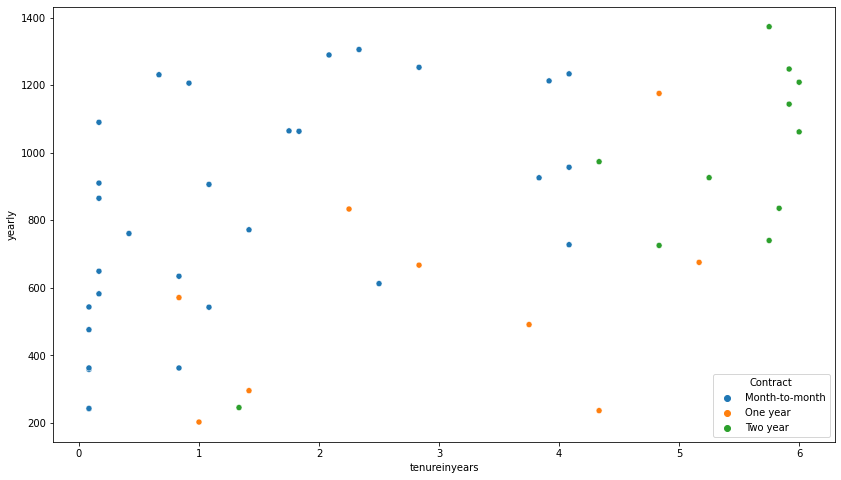

In [ ]:
plt.figure(figsize=(14,8))

sns.scatterplot(data = df,x= df.tenureinyears,y= df['yearly'],hue = df['Contract'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['tenureinyears','yearly']])
y_predicted

array([2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yearly,tenureinyears,distance,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,358.200000,0.083333,-305.227966,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,666.882353,2.833333,-116.444871,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,648.900000,0.166667,-18.161277,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,490.866667,3.750000,-332.426977,2
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,909.900000,0.166667,242.838723,0


In [ ]:
km.cluster_centers_

array([[2.66666667e+00, 7.73590688e+02],
       [3.43750000e+00, 1.19736241e+03],
       [1.09615385e+00, 3.53666068e+02]])

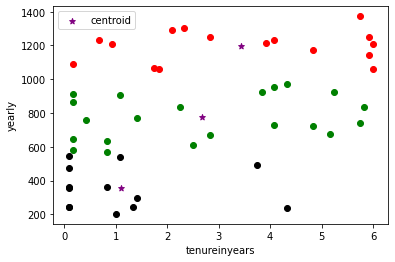

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.tenureinyears,df1['yearly'],color='green')
plt.scatter(df2.tenureinyears,df2['yearly'],color='red')
plt.scatter(df3.tenureinyears,df3['yearly'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('tenureinyears')
plt.ylabel('yearly')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['yearly']])
df['yearly'] = scaler.transform(df[['yearly']])

scaler.fit(df[['tenureinyears']])
df['tenureinyears'] = scaler.transform(df[['tenureinyears']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


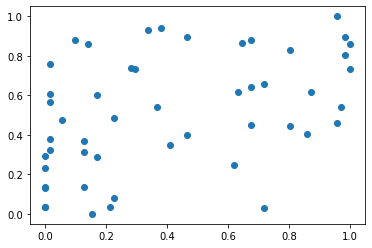

In [ ]:
plt.scatter(df.tenureinyears,df['yearly'])

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['tenureinyears','yearly']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,yearly,tenureinyears,distance,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0.133197,0.000000,-305.227966,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.396844,0.464789,-116.444871,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0.381485,0.014085,-18.161277,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0.246508,0.619718,-332.426977,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0.604406,0.014085,242.838723,2


In [ ]:
km.cluster_centers_

array([[0.17790956, 0.20092948],
       [0.83678542, 0.6884204 ],
       [0.20422535, 0.71477999]])

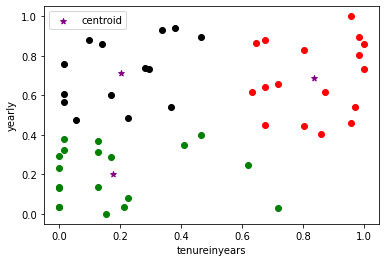

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.tenureinyears,df1['yearly'],color='green')
plt.scatter(df2.tenureinyears,df2['yearly'],color='red')
plt.scatter(df3.tenureinyears,df3['yearly'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('tenureinyears')
plt.ylabel('yearly')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['tenureinyears','yearly']])
    sse.append(km.inertia_)

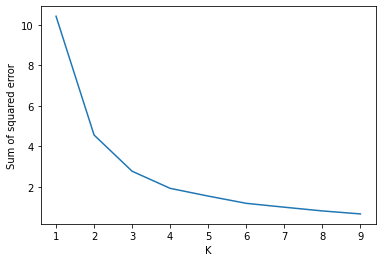

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)